In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os

from pydaha.visualization.optimals import optimal_objective
from pcoptim import Logistic
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import fetch_california_housing
from sklearn.datasets import fetch_openml

from pydaha.datasets.normal import make_regression

In [2]:
def save(directory, name, X, y, raw=True, norm=True, plot=True):
    # create directory
    os.makedirs(directory, exist_ok=True)
    path = directory + "/" + name
    
    # generate raw dataframe with y as "target" and save it
    if raw:
        df = pd.DataFrame(X)
        df["target"] = y
        df.to_csv(path + "_raw.csv", index=False)
    
    # generate a normalized dataframe with y as "target" and save it
    if norm:
        scaler = StandardScaler()
        X_norm = scaler.fit_transform(X)
        
        df_norm = pd.DataFrame(X_norm)
        df_norm["target"] = y
        df_norm.to_csv(path + "_norm.csv", index=False)
        
    # plot coordinate-wise norms
    if plot:
        fig, ax = plt.subplots(1, 2, figsize=(12,4))
        x=np.arange(X.shape[1])
        
        ax[0].bar(x, np.linalg.norm(X, axis=0) ** 2 / X.shape[0])
        ax[0].set_yscale("log")
        
        ax[1].bar(x, np.linalg.norm(X_norm, axis=0) ** 2 / X.shape[0])

# Electricity

In [3]:
electricity = fetch_openml("electricity")
X_electricity, y_electricity = np.array(electricity.data, dtype=float), np.array(electricity.target)
y_electricity[y_electricity == "UP"] = 1
y_electricity[y_electricity == "DOWN"] = -1
y_electricity = np.array(y_electricity, dtype=float)

In [4]:
X_electricity.shape

(45312, 8)

In [5]:
np.linalg.norm(X_electricity, axis=0)

array([128.58370246, 952.44527402, 123.55031253,  14.97338669,
        97.00114868,   2.2958399 ,  93.63436389, 111.43488245])

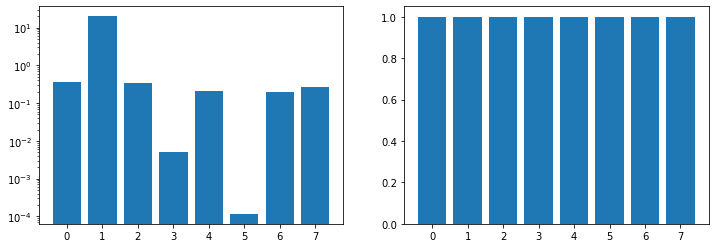

In [6]:
save("electricity/data", "electricity", X_electricity, y_electricity)

# Houses 

In [7]:
dhouse = fetch_openml("houses", version=2)
X_houses = np.array(dhouse.data)
y = np.array(dhouse.target)
y[y == 'P'] = 1
y[y != 1] = -1
y_houses = np.array(y)

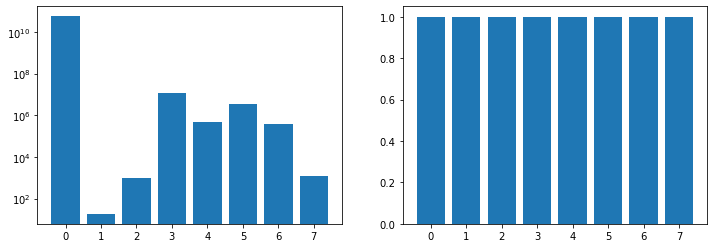

In [8]:
save("houses/data", "houses", X_houses, y_houses)

# California

In [9]:
X_california, y_california = fetch_california_housing(return_X_y=True)

In [10]:
save("california/data", "california", X_california, y_california)

# LASSO

In [11]:
rng = np.random.default_rng(seed=42)
w = np.zeros(1000)
w[:10] = rng.normal(scale=100, size=10)
X_lasso, y_lasso, w_lasso = make_regression(1000, 1000, w, snr=3)

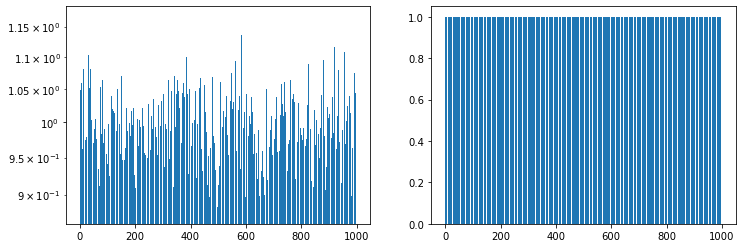

In [12]:
save("lasso/data", "lasso", X_lasso, y_lasso)